# Desafio #9

### Instalação de libs requeridas

In [1]:
!pip install opencv-python imutils

In [1]:
# Libs de apoio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os , random , json , requests
import types
import pandas as pd

# Libs para criação de modelo DeepLearning
# ATENÇÃO - Não utilizar o Keras interno do Tensorflow por incompatibilidade com o WML
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import InputLayer
from keras.preprocessing import image as Kimage
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from imutils import paths

# Libs para comunicação APIs Watson IBM
from ibm_botocore.client import Config
import ibm_boto3
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/home/cprado/projetos/hackathon/ibm/behind-the-code-2019/btc9/env9/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cprado/projetos/hackathon/ibm/behind-the-code-2019/btc9/env9/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cprado/projetos/hackathon/ibm/behind-the-code-2019/btc9/env9/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
 

### Download do Dataset(imagens) da competição

In [ ]:
!wget -O dataset102.zip https://www.dropbox.com/s/trcr1k2dfmk8b44/DatasetBHTC.zip?dl=0

!unzip -o ./dataset102.zip
!mkdir DATASET
!mv CLEAN DIRTY DATASET

--2019-08-17 15:56:51--  https://www.dropbox.com/s/trcr1k2dfmk8b44/DatasetBHTC.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/trcr1k2dfmk8b44/DatasetBHTC.zip [following]
--2019-08-17 15:56:53--  https://www.dropbox.com/s/raw/trcr1k2dfmk8b44/DatasetBHTC.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde946763987701d2dc7dc751af.dl.dropboxusercontent.com/cd/0/inline/Am22VEl_rs95O9rsFjZH13GNVXxJSeitGJ-OMXZ2cVX5Cme4m4QX1XfWEwCU9kbFD2XZac4KK3pxHXlrqV2Za6LgnosEdWCCHPzMa_yN5cC6_dvWGLDiFm342qa9TYjbjDU/file# [following]
--2019-08-17 15:56:53--  https://ucde946763987701d2dc7dc751af.dl.dropboxusercontent.com/cd/0/inline/Am22VEl_rs95O9rsFjZH13GNVXxJSeitGJ-OMXZ2cVX5Cme4m4QX1XfWEwCU9kbFD2XZac4KK3pxHXlrqV2Za6LgnosEdWCCHPzM

### Definição do Modelo - Não alterar o input_shape

In [57]:
random.seed(1)
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(96,96,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               2359424   
__________

### Load das imagens, já com pre-processing, para utilizar no Train do modelo

In [3]:
imagePaths = sorted(list(paths.list_images('DATASET/')))

random.seed(1)
random.shuffle(imagePaths)

data = []
labels = []

for imagePath in imagePaths:
    image = Kimage.load_img(imagePath,target_size=(96,96))
    image = img_to_array(image)
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [4]:
labels

['CLEAN',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'CLEAN',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'DIRTY',
 'DIRTY',
 'CLEAN',
 'CLEAN',


### Split do dataset em Train e Test

In [49]:
classes = ['CLEAN', 'DIRTY']
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
data = np.array(data, dtype="float") / 255.0

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=1)


from keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

print("shape de X de treino :",trainX.shape)
print("shape de Y de treino :",trainY.shape)
print("shape de X de teste :",testX.shape)
print("shape de Y de teste :",testY.shape)

shape de X de treino : (164, 96, 96, 3)
shape de Y de treino : (164, 2)
shape de X de teste : (42, 96, 96, 3)
shape de Y de teste : (42, 2)


### Treinamento do modelo - utilizando DataGenerator

In [8]:
aug

In [15]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [59]:
random.seed(1)
model.fit_generator(
    aug.flow(trainX, trainY, batch_size=16),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // 16,
    epochs=40)

Epoch 1/40
10/10 [==============================] - 1s 97ms/step - loss: 0.6883 - acc: 0.5625 - val_loss: 0.7118 - val_acc: 0.4286
Epoch 2/40
10/10 [==============================] - 1s 89ms/step - loss: 0.6945 - acc: 0.5270 - val_loss: 0.7080 - val_acc: 0.4286
Epoch 3/40
10/10 [==============================] - 1s 87ms/step - loss: 0.6873 - acc: 0.5693 - val_loss: 0.7127 - val_acc: 0.4286
Epoch 4/40
10/10 [==============================] - 1s 86ms/step - loss: 0.6922 - acc: 0.5422 - val_loss: 0.7110 - val_acc: 0.4286
Epoch 5/40
10/10 [==============================] - 1s 91ms/step - loss: 0.7051 - acc: 0.4722 - val_loss: 0.7037 - val_acc: 0.4286
Epoch 6/40
10/10 [==============================] - 1s 88ms/step - loss: 0.6753 - acc: 0.6304 - val_loss: 0.7300 - val_acc: 0.4286
Epoch 7/40
10/10 [==============================] - 1s 95ms/step - loss: 0.6981 - acc: 0.5207 - val_loss: 0.7082 - val_acc: 0.4286
Epoch 8/40
10/10 [==============================] - 1s 97ms/step - loss: 0.6931 - a

### Gráficos para avaliação do modelo

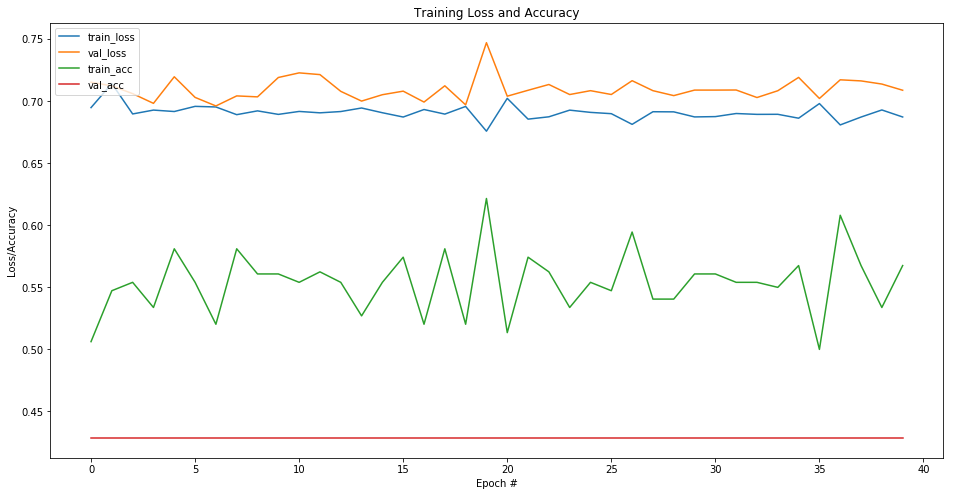

In [56]:
H=model.history
plt.rcParams['figure.figsize'] = 16, 8
plt.figure()
N = H.epoch[-1]+1
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

### Save do modelo como model.h5

In [54]:
model.save("model_WSTUDIO.h5")

### Upload do modelo no IBM Cloud Object Storage

### Upload do modelo no IBM Watson Machine Learning - para export de API

In [55]:
# o modelo deve estar em formato .tar.gz para subir no WML
!tar -zcvf model_WSTUDIO.tar.gz model_WSTUDIO.h5

model_WSTUDIO.h5


In [ ]:
# Credenciais do Watson Machine Learning
wml_credentials  = {
  "apikey": "K9SRZk1WdW9oA_uEbSUV6IBDnYOz5RC8FTSnqB0pWiPT",
  "iam_apikey_description": "Auto-generated for key 8d98bf3c-518d-492f-a271-d0b6b7ebd362",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/1de11f71360f42fd9ba01f2b76bced35::serviceid:ServiceId-e809b862-d7cc-4230-8f62-7c56d45935f2",
  "instance_id": "f872faaa-1d3b-4d8a-9cf7-1eef9672debb",
  "url": "https://us-south.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient( wml_credentials )

# Definição de metadados do modelo (versao de python, framework, libs e etc)
sample_saved_model_filename = 'model_WSTUDIO.tar.gz'
metadata = {
    client.repository.ModelMetaNames.NAME              : 'MY_FIRST_SUBMIT',
    client.repository.ModelMetaNames.FRAMEWORK_NAME    : 'tensorflow',
    client.repository.ModelMetaNames.FRAMEWORK_VERSION : '1.11',
    client.repository.ModelMetaNames.RUNTIME_NAME      : 'python',
    client.repository.ModelMetaNames.RUNTIME_VERSION   : '3.6',
    client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES :  [{"name": "keras", "version": "2.2.4"}]
}


# Conexão com o WML
model_details = client.repository.store_model( sample_saved_model_filename, meta_props=metadata, training_data=None )

# Deploy do modelo
model_id = model_details["metadata"]["guid"]
model_deployment_details = client.deployments.create( artifact_uid=model_id, name="MY FIRST SUBMIT D9 Behind The Code" )

# Retrieve da URL da API para consumo da mesma
model_endpoint_url = client.deployments.get_scoring_url( model_deployment_details )
print("A URL de chamada da sua API é : ",model_endpoint_url)

### Chamada da API para teste

In [ ]:
# Download de imagem teste
!wget -O teste2.jpg https://www.dropbox.com/s/73fofwe566749sl/teste123.jpg?dl=0

In [ ]:
# Montagem da estrutura de JSON para chamada da API do WML
ai_parms = { "wml_credentials" : wml_credentials, "model_endpoint_url" : model_endpoint_url }

# Load da imagem de teste e pre-processing da mesma - para entrada na rede neural convolucional
image = Kimage.load_img("teste2.jpg")
plt.imshow(image)
image = image.resize(size=(96,96))
image = img_to_array(image)
image = np.array(image, dtype="float") / 255.0
image = np.expand_dims(image,axis=0)
image = image.tolist()

# Chamada da função SCORE no modelo (inference)
model_payload = { "values" : image }
model_result = client.deployments.score( ai_parms["model_endpoint_url"], model_payload )
print(model_result)

print("\nImagem Classificada como : ", classes[model_result['values'][0][1][0]])

print("\nProbabilidades : \n\t",
      classes[model_result['values'][0][1][0]]," : %.2f" %(model_result['values'][0][0][0]*100),"%\n\t",
     )

# BOA SORTE